#### Importing basic libraries

In [1]:
import pandas as pd
import numpy as np 
import warnings
warnings.filterwarnings('ignore')

### Importing the dataset


In [2]:
df =pd.read_csv(r'C:\Users\DELL\Downloads\titanic_trainN.csv')
df.head() ### Checking the dataset 

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### As we know that we have to predict the survival of the passenger. So, this is very common that survival of the passenger is not depend on his name, his ticket, Cabin and passenger id. So, I am dropping the column PassengerId,Name and Ticket.

In [3]:
df.drop(columns=['PassengerId','Name','Ticket', 'Cabin'], inplace=True) ### dropping the unnecessary column
df.head() ### Checking the updated dataframe 

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


#### Now the Dataset is free from unnecessary columns.

In [4]:
### Checking the share of the dataset 
df.shape

(891, 8)

In [5]:
### Checking the null values of the dataset
df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

### There are some features, those has null values. So, I will deal with null values after changing the categorical data into the interger form.

In [6]:
df['Embarked']=df['Embarked'].fillna("S")
df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      0
dtype: int64

In [7]:
from sklearn.preprocessing import LabelEncoder ### Importing label encoder
le= LabelEncoder() 

In [8]:
col= ['Sex',"Embarked"]
df[col] = df[col].apply(le.fit_transform) 
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2


#### I changed the categorical data into the interger form. Now going to fill null values through the simpleImputer.

In [9]:
#### Importing the Simple Imputer library 
from sklearn.impute import SimpleImputer
SI_mean=SimpleImputer(strategy="mean")

In [10]:
#age= SI.fit_transform(df['Age'])
SI_mean = SI_mean.fit(df[['Age']])
df['Age'] = SI_mean.transform(df[['Age']])
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.000000,1,0,7.2500,2
1,1,1,0,38.000000,1,0,71.2833,0
2,1,3,0,26.000000,0,0,7.9250,2
3,1,1,0,35.000000,1,0,53.1000,2
4,0,3,1,35.000000,0,0,8.0500,2
...,...,...,...,...,...,...,...,...
886,0,2,1,27.000000,0,0,13.0000,2
887,1,1,0,19.000000,0,0,30.0000,2
888,0,3,0,29.699118,1,2,23.4500,2
889,1,1,1,26.000000,0,0,30.0000,0


In [11]:
#### Checking the missing values again
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

#### Now there is now null value in the dataset. 

In [12]:
### Checking the datatype of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int32  
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    int32  
dtypes: float64(2), int32(2), int64(4)
memory usage: 48.9 KB


## EDA

In [13]:
### Importing the basic visualization matrix
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

0    549
1    342
Name: Survived, dtype: int64


<AxesSubplot:xlabel='Survived', ylabel='count'>

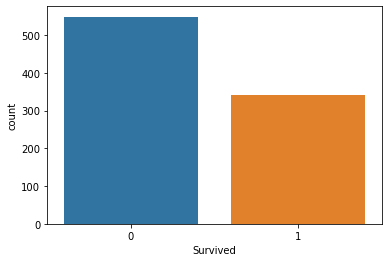

In [14]:
print(df['Survived'].value_counts())
sns.countplot(x='Survived', data=df)

### Target is imblanced but not more. So, dont need to do balancing of the target data. 

3    491
1    216
2    184
Name: Pclass, dtype: int64


<AxesSubplot:xlabel='Pclass', ylabel='count'>

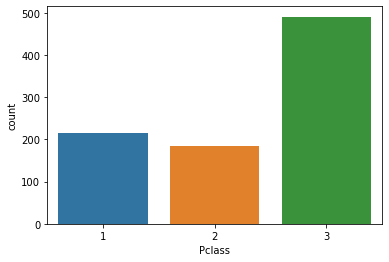

In [15]:
print(df['Pclass'].value_counts())
sns.countplot(x='Pclass', data=df)

1    577
0    314
Name: Sex, dtype: int64


<AxesSubplot:xlabel='Sex', ylabel='count'>

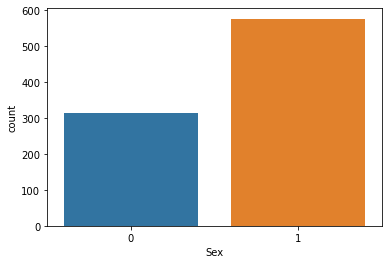

In [16]:
print(df['Sex'].value_counts())
sns.countplot(x='Sex', data=df)

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64


<AxesSubplot:xlabel='SibSp', ylabel='count'>

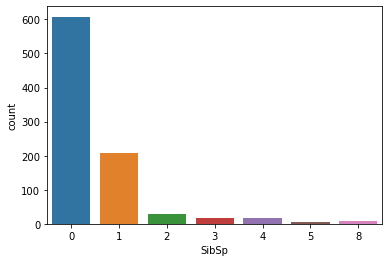

In [17]:
print(df['SibSp'].value_counts())
sns.countplot(x='SibSp', data=df)

0    678
1    118
2     80
3      5
5      5
4      4
6      1
Name: Parch, dtype: int64


<AxesSubplot:xlabel='Parch', ylabel='count'>

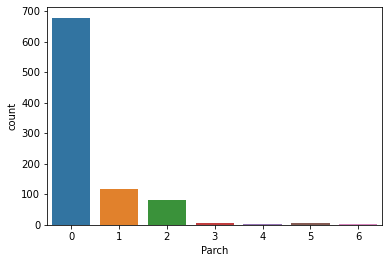

In [18]:
print(df['Parch'].value_counts())
sns.countplot(x='Parch', data=df)

2    646
0    168
1     77
Name: Embarked, dtype: int64


<AxesSubplot:xlabel='Embarked', ylabel='count'>

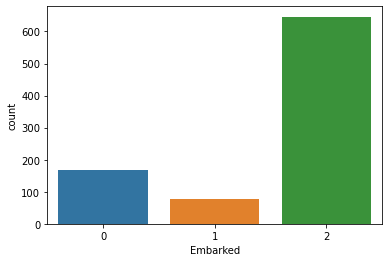

In [19]:
print(df['Embarked'].value_counts())
sns.countplot(x='Embarked', data=df)

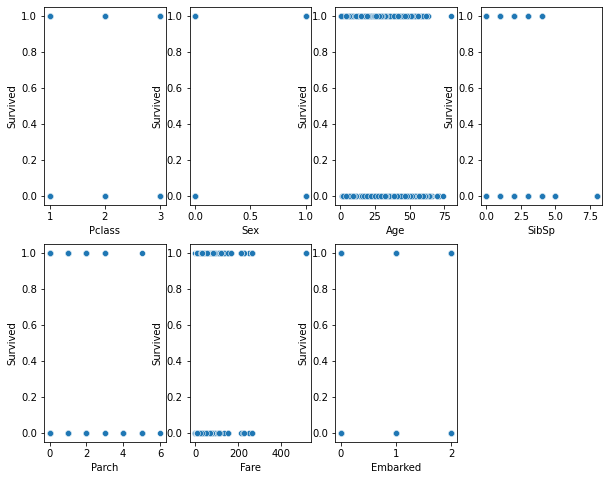

In [20]:
#### Plotting scatterplot to check the trend between features and target
x=df.drop(columns='Survived')
y=df['Survived']
plt.figure(figsize=(10,8))
pn=1
for column in x:
    if pn <= 8:
        plt.subplot(2,4, pn)
        sns.scatterplot(x[column],y)
        plt.xlabel(column)
    pn+=1
plt.show()

### All the feature has good trend with target. Now I will check the multicollinearity of the dataset

<function matplotlib.pyplot.show(close=None, block=None)>

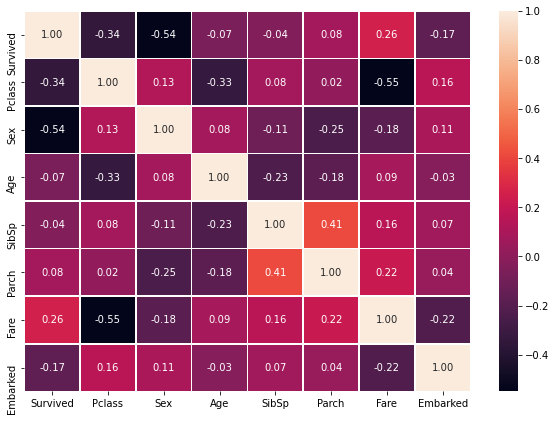

In [21]:
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(), annot=True, fmt='.2f', linewidths=0.5)
plt.show

### No feature has multicollinearity with each other only Parch and Sibsp has some relation which is 41%. So, I do not need to worry about that. 

### The target has maximum trend with - Pclass(11%)
### The target has minimum trend with - Sibsp(3%)

### No feature has strong trend with target. So, I will keep all feature for Model building.

## Plotting distplot to check the distribution of data.

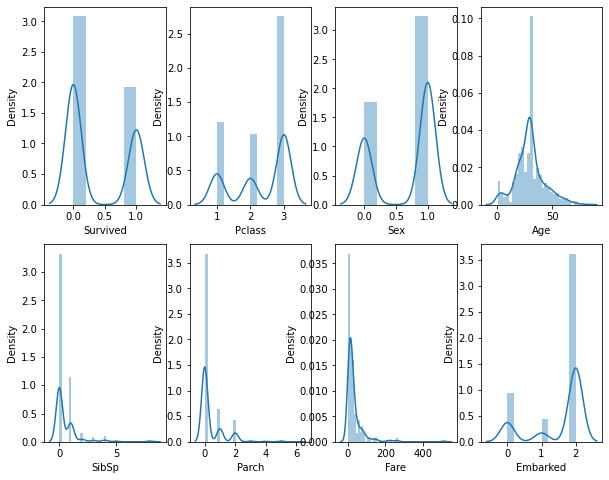

In [22]:
plt.figure(figsize=(10,8))
pn=1
for column in df:
    if pn <= 8:
        plt.subplot(2,4, pn)
        sns.distplot(df[column])
        plt.xlabel(column)
    pn+=1
plt.show()

####  Survived, Pclass, Sex,Sibsp, Parch, Embarked has categorical values only Fare and Age has continues data. So, Age has approx normal distribution. Fare values also has normal distribiution with some right skewed.

#### Checking the stats of the dataset

<function matplotlib.pyplot.show(close=None, block=None)>

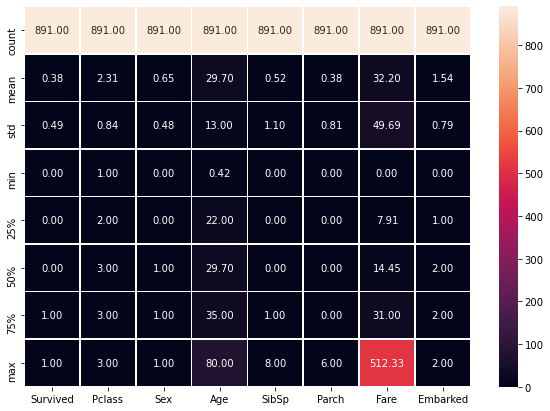

In [23]:
plt.figure(figsize=(10,7))
sns.heatmap(df.describe(), annot=True, fmt='.2f', linewidths=0.5)
plt.show

#### Stats of all the dataset show normal but its shows that Fare feature has some outliers. So, I will cross check this with boxplot and this still shows there will deal with outliers

### Checking the Skewness.

In [24]:
x.skew()

Pclass     -0.630548
Sex        -0.618921
Age         0.434488
SibSp       3.695352
Parch       2.749117
Fare        4.787317
Embarked   -1.264823
dtype: float64

#### Keeping the thresold of +\-0.5. Now going to dealing with skewness with the help of power transform. 

In [25]:
from sklearn.preprocessing import power_transform
x_new = power_transform(x)
x=pd.DataFrame(x_new, columns=x.columns)

In [26]:
x.skew() ### Checking is skewness is removed or not

Pclass     -0.441438
Sex        -0.618921
Age         0.064420
SibSp       0.808608
Parch       1.228795
Fare       -0.040329
Embarked   -1.064527
dtype: float64

### Checking the outliers

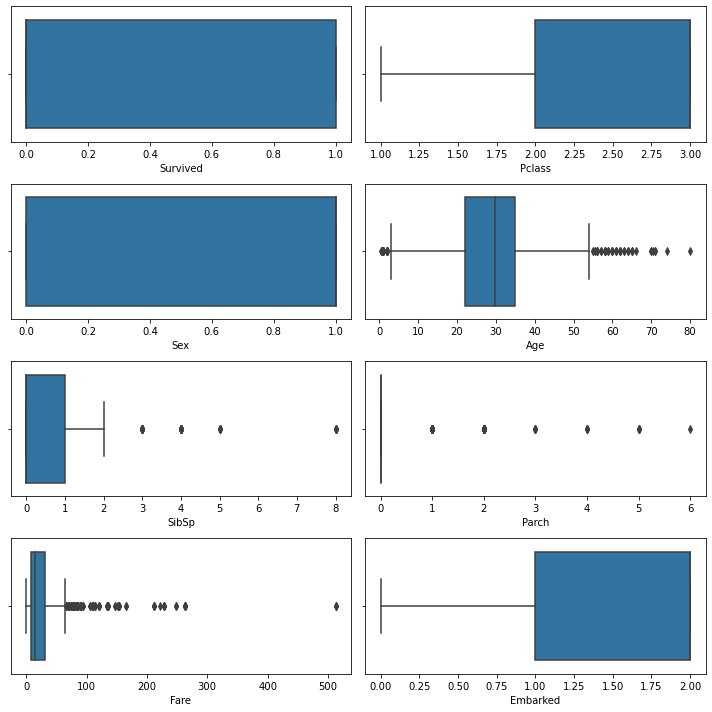

In [27]:
plt.figure(figsize=(10,10))
pn = 1
for column in df:
    if pn <= 8:
        ax = plt.subplot(4,2, pn)
        sns.boxplot(df[column])
        plt.xlabel(column)
    pn+=1
plt.tight_layout()

### There are 4 features which has so many outliers. So, I will deal with these outliers with Zscore

In [28]:
### Importing Zscore
from scipy.stats import zscore
import numpy as np
z=np.abs(zscore(df))
z.shape

(891, 8)

In [29]:
thresold =3
print(np.where(z>3))

(array([ 13,  16,  25,  27,  50,  59,  68,  71,  86,  88,  96, 116, 118,
       119, 159, 164, 167, 171, 180, 182, 201, 233, 258, 261, 266, 278,
       299, 311, 324, 341, 360, 377, 380, 386, 437, 438, 438, 480, 493,
       527, 541, 542, 557, 567, 610, 630, 638, 672, 678, 679, 683, 686,
       689, 700, 716, 730, 736, 737, 742, 745, 774, 779, 787, 792, 813,
       824, 846, 850, 851, 858, 863, 885], dtype=int64), array([5, 4, 5, 6, 4, 4, 4, 4, 5, 6, 3, 3, 6, 4, 4, 4, 5, 4, 4, 4, 4, 4,
       6, 4, 4, 4, 6, 6, 4, 6, 5, 6, 6, 4, 5, 5, 6, 4, 3, 6, 4, 4, 6, 5,
       5, 3, 5, 3, 5, 6, 4, 4, 6, 6, 6, 6, 5, 6, 6, 3, 5, 6, 4, 4, 4, 4,
       4, 4, 3, 5, 4, 5], dtype=int64))


In [30]:
df_new =df[(z<3).all(axis=1)]
df_new.shape

(820, 8)

### DATA LOSS

In [31]:
data_loss = (891-820)/891*100
print("Data Loss of the dataset after removing the outliers", data_loss )

Data Loss of the dataset after removing the outliers 7.968574635241302


### Data loss is 7.9% which is acceptable. 

### Spliting the dataset into the feature and target and Proceed toward the model building 

In [32]:
x=df_new.drop(columns='Survived')
y=df_new['Survived']

### Importing some preprocesing library for model 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [33]:
### Scaling then feature with standard scaler 
sc = StandardScaler()
x_scaled= sc.fit_transform(x)

In [34]:
#### Splitting the dataset into traing data and testing data
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y, test_size=0.20, random_state=25)
print(len(x_train), len(y_train), len(x_test), len(y_test))

656 656 164 164


In [59]:
### Importing the model building libraries
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [36]:
### Importing the LogisticRegression and checking the score
lr= LogisticRegression()
lr.fit(x_train,y_train)
pred_lr=lr.predict(x_test)
acc_lr =accuracy_score(y_test,pred_lr)

print("\n LogisticRegression Model Accuracy ",  '\n\nAccuracy_score for LogisticRegression model', acc_lr*100)


 LogisticRegression Model Accuracy  

Accuracy_score for LogisticRegression model 81.70731707317073


In [37]:
### Importing the RandomForestClassifier and checking the score 
RFC= RandomForestClassifier()
RFC.fit(x_train,y_train)
pred_RFC=RFC.predict(x_test)
acc_RFC =accuracy_score(y_test,pred_RFC)

print("\n RandomForestClassifier Model Accuracy",  '\n\nAccuracy_score for RandomForestClassifier model', acc_RFC*100)


 RandomForestClassifier Model Accuracy 

Accuracy_score for RandomForestClassifier model 79.26829268292683


In [38]:
### Importing the DecisionTreeClassifier and checking the score
DTC= DecisionTreeClassifier()
DTC.fit(x_train,y_train)
pred_DTC=DTC.predict(x_test)
acc_DTC =accuracy_score(y_test,pred_DTC)

print("\n DecisionTreeClassifier Model Accuracy",  '\n\nAccuracy_score for DecisionTreeClassifier model', acc_DTC*100)


 DecisionTreeClassifier Model Accuracy 

Accuracy_score for DecisionTreeClassifier model 76.82926829268293


In [39]:
### Importing the KNeighborsClassifier and checking the score 
KNC= KNeighborsClassifier()
KNC.fit(x_train,y_train)
pred_KNC=KNC.predict(x_test)
acc_KNC =accuracy_score(y_test,pred_KNC)

print("\n KNeighborsClassifier Model Accuracy",  '\n\nAccuracy_score for KNeighborsClassifier model', acc_KNC*100)


 KNeighborsClassifier Model Accuracy 

Accuracy_score for KNeighborsClassifier model 81.70731707317073


In [40]:
### Importing the SVC and checking the score
svc= SVC()
svc.fit(x_train,y_train)
pred_svc=svc.predict(x_test)
acc_svc =accuracy_score(y_test,pred_KNC)

print("\n SVC Model Accuracy",  '\n\nAccuracy_score for SVC model', acc_svc*100)


 SVC Model Accuracy 

Accuracy_score for SVC model 81.70731707317073


### I performed 5 model prediction Accuracy score, those score are mentioned below - 

#### Accuracy score for LogisticRegression model 81.70731707317073
#### Accuracy score for RandomForestClassifier model 80.48780487804879
#### Accuracy score for DecisionTreeClassifier model 76.82926829268293
#### Accuracy score for KNeighborsClassifier model 81.70731707317073
#### Accuracy score for SVC model 81.70731707317073

### From the above, I conclude that I will go forward with KNeighborsClassifier because three model has same accuracy score but we can do better hyperparameter tuning with KNeighborsClassifier. May the Accuracy will increase.


### The KNeighborsClassifier model is performing good but still I will try to inscrease the Accuracy score thorgh hypertuning of paramenter using grid searchCV

In [41]:
#### importing the GridSearchCV for hyperparameter tuning.
from sklearn.model_selection import GridSearchCV
KNC = KNeighborsClassifier()
param_grid = {"algorithm":['kd_tree', 'brute'],
            'leaf_size':range(5,25),
            'n_neighbors':range(3,20)}

gridsearch = GridSearchCV(estimator=KNC, param_grid=param_grid)
gridsearch.fit(x_train,y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['kd_tree', 'brute'],
                         'leaf_size': range(5, 25),
                         'n_neighbors': range(3, 20)})

In [42]:
gridsearch.best_params_

{'algorithm': 'kd_tree', 'leaf_size': 5, 'n_neighbors': 16}

In [54]:
KNC = KNeighborsClassifier(algorithm='kd_tree', leaf_size= 8, n_neighbors=15)

In [55]:
### Importing the KNeighborsClassifier and checking the score 
KNC.fit(x_train,y_train)
pred_KNC=KNC.predict(x_test)
acc_KNC =accuracy_score(y_test,pred_KNC)

print("\n KNeighborsClassifier Model Accuracy",  '\n\nAccuracy_score for after tunning parameter of KNeighborsClassifier model', acc_KNC*100)


 KNeighborsClassifier Model Accuracy 

Accuracy_score for after tunning parameter of KNeighborsClassifier model 84.14634146341463


### Hyperparameter tuning increased the socre of the model now the accuracy of the model is 84.14 %.  Now checking the classification report, Confution matrix and F1 Score.  

In [58]:
cla_r = classification_report(y_test,pred_KNC)
print(cla_r)

              precision    recall  f1-score   support

           0       0.84      0.91      0.87        97
           1       0.85      0.75      0.79        67

    accuracy                           0.84       164
   macro avg       0.84      0.83      0.83       164
weighted avg       0.84      0.84      0.84       164



In [60]:
print(confusion_matrix(y_test,pred_KNC))

[[88  9]
 [17 50]]


### ROC AUC plot

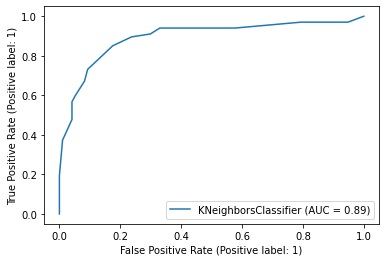

In [61]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(gridsearch.best_estimator_,x_test,y_test)
plt.show()

### The accuracy score of the model is 84% and AUC score is 89%. Which is good.

### Saving the model 

In [62]:
import joblib
joblib.dump(KNC, 'Titanic.pkl')

['Titanic.pkl']